# Python SWAT - Native Python Interface to SAS Viya

This Python notebook is part of a workflow that starts in SAS Studio with Readmissions_Studio.sas, which handles data prep and a modeling example. Python SWAT (SAS Scripting Wrapper for Analytics Transfer) allows the user to create the same machine learning process on the same data set.

### Load SWAT and Other Python Packages; Connect CAS Session

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from IPython.core.display import display, HTML 
%matplotlib inline 
import swat 
from swat import * 
#swat.options.cas.print_messages = False
from getpass import * 
s = CAS(hostname='cascontroller.hlsrwe.sashq-d.openstack.sas.com', port=8777, username=input("SSO Username:"), password=getpass("SSO Password:"), protocol = 'https')

SSO Username:anddwi
SSO Password:········


# Data Exploration

### Store CASLIB Information in a Python Variable

In [2]:
currentCaslib = 'PUBLIC'

### SWAT Functions for Table Information

In [3]:
s.table.tableinfo(caslib=currentCaslib)

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier
0,HOSPITAL_READMISSIONS_DEMO_FACT_1,358431,34,0,utf-8,13Apr2018:14:33:13,13Apr2018:14:33:15,13Apr2018:14:33:15,UTF8,1.839249e+09,1.839249e+09,1.839249e+09,1,0,0,HOSPITAL_READMISSIONS_DEMO_FACT_1.sashdat,Public,0,dareev,
1,PMPM_ELIGIBILITY_DATA,458431,7,0,utf-8,13Apr2018:14:37:30,13Apr2018:14:37:31,13Apr2018:14:37:31,UTF8,1.839249e+09,1.839249e+09,1.839249e+09,1,0,0,,,0,dareev,
2,HOSPITAL_READMISSIONS_DEMO_FACT,358431,26,0,utf-8,13Apr2018:14:37:31,13Apr2018:14:37:34,13Apr2018:14:41:35,UTF8,1.839249e+09,1.839249e+09,1.839250e+09,1,0,0,,,0,dareev,
3,READ_PHYSICIAN_DEMO_DIM,95864,9,0,utf-8,13Apr2018:14:37:34,13Apr2018:14:37:35,13Apr2018:14:46:21,UTF8,1.839249e+09,1.839249e+09,1.839250e+09,1,0,0,,,0,dareev,
4,READMISSIONS_FINAL,75675,40,0,utf-8,13Apr2018:14:37:35,13Apr2018:14:37:37,13Apr2018:14:50:05,UTF8,1.839249e+09,1.839249e+09,1.839250e+09,1,0,0,,,0,dareev,
5,READMISSION_PERFORMANCE_STATS,3,9,0,utf-8,13Apr2018:14:45:06,13Apr2018:14:45:06,13Apr2018:14:45:13,UTF8,1.839250e+09,1.839250e+09,1.839250e+09,1,0,0,readmission_performance_stats.sashdat,Public,0,dareev,
6,READMIT_PREP,161067,56,0,utf-8,13Apr2018:15:05:49,13Apr2018:15:05:49,13Apr2018:15:05:50,UTF8,1.839251e+09,1.839251e+09,1.839251e+09,1,0,0,,,0,anddwi,
7,READMIT_PART,161067,57,0,utf-8,13Apr2018:15:05:50,13Apr2018:15:05:51,13Apr2018:15:05:51,UTF8,1.839251e+09,1.839251e+09,1.839251e+09,1,0,0,,,0,anddwi,
8,READMIT_IMPUTED,161067,61,0,utf-8,13Apr2018:15:05:51,13Apr2018:15:05:51,17Apr2018:13:19:59,UTF8,1.839251e+09,1.839251e+09,1.839590e+09,1,0,0,,,0,anddwi,
9,LB_NUM,59580,26,0,utf-8,13Apr2018:17:45:30,13Apr2018:17:45:30,13Apr2018:17:45:42,UTF8,1.839261e+09,1.839261e+09,1.839261e+09,1,0,0,LB_NUM.sashdat,Public,0,jimbox,


In [4]:
readmit_imputed = s.CASTable(caslib=currentCaslib,name='readmit_imputed')

In [5]:
readmit_imputed.head()

,ENCOUNTER_KEY,PATIENT_NUMBER,DOCTOR,ADMIT_DATE,DISCHARGE_DATE,readmit_date,readmit_discharge_date,readmit_days,Diagnosis_Group,icd9_target,...,op_visits30,PatientAge,HOSPITAL,REGION,READMIT,_PartInd_,IM_order_set_used,IM_LENGTH_OF_STAY,IM_Num_Chronic_Cond,IM_PatientAge
0,105301489.0,9921961489,292722,18952.0,18967.0,NaN,NaN,,AMI,1.0,...,2.0,70.0,Hosp 4,Region 2,N,1.0,1.0,2.0,0.0,70.0
1,105301492.0,9921961492,275709,18825.0,18849.0,NaN,NaN,,CHF,1.0,...,1.0,72.0,Hosp 1,Region 1,N,1.0,1.0,24.0,1.0,72.0
2,105301495.0,9921961495,275709,19033.0,19039.0,19043.0,19049.0,01-07,CHF,1.0,...,0.0,73.0,Hosp 26,Region 8,Y,0.0,1.0,1.0,4.0,73.0
3,105301498.0,9921961498,220194,19031.0,19035.0,NaN,NaN,,COPD,0.0,...,0.0,71.0,Hosp 4,Region 2,N,1.0,1.0,14.0,0.0,71.0
4,105301501.0,9921961501,283030,19028.0,19029.0,NaN,NaN,,CHF,1.0,...,0.0,71.0,Hosp 31,Region 9,N,1.0,1.0,1.0,0.0,71.0


### Plot Numeric Variable Distribution - CAS/Python

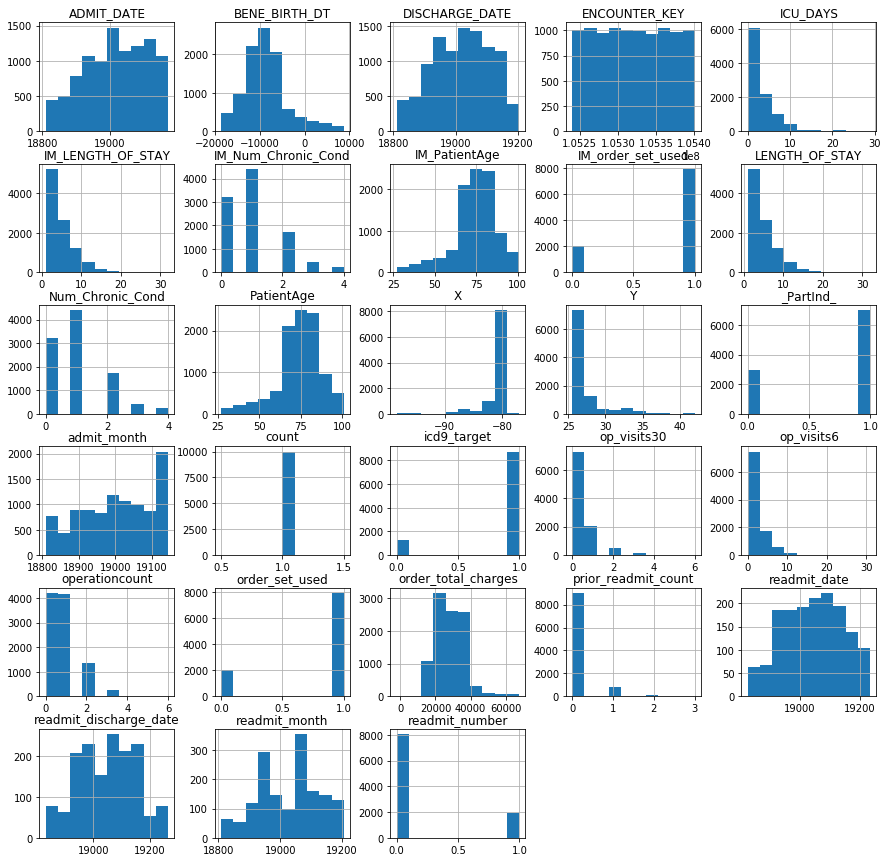

In [6]:
readmit_imputed.hist(figsize = (15, 15));

In [5]:
sas_actionsets = ['builtins','table','pca','decisionTree','sampling','percentile','neuralNet']
#loading SAS actionsets using list comprehension
[s.loadactionset(actionset=i) for i in sas_actionsets]

NOTE: Added action set 'builtins'.
NOTE: Added action set 'table'.
NOTE: Added action set 'pca'.
NOTE: Added action set 'decisionTree'.
NOTE: Added action set 'sampling'.
NOTE: Added action set 'percentile'.
NOTE: Added action set 'neuralNet'.


[[actionset]
 
  'builtins'
 
 + Elapsed: 0.0152s, user: 0.00758s, sys: 0.0049s, mem: 0.971mb, [actionset]
 
  'table'
 
 + Elapsed: 0.0104s, user: 0.00354s, sys: 0.00464s, mem: 0.837mb, [actionset]
 
  'pca'
 
 + Elapsed: 0.0262s, user: 0.00995s, sys: 0.0256s, mem: 0.861mb, [actionset]
 
  'decisionTree'
 
 + Elapsed: 0.0195s, user: 0.00571s, sys: 0.0167s, mem: 0.959mb, [actionset]
 
  'sampling'
 
 + Elapsed: 0.0169s, user: 0.00567s, sys: 0.012s, mem: 0.834mb, [actionset]
 
  'percentile'
 
 + Elapsed: 0.0132s, user: 0.00452s, sys: 0.00584s, mem: 0.83mb, [actionset]
 
  'neuralNet'
 
 + Elapsed: 0.0183s, user: 0.00447s, sys: 0.0158s, mem: 0.885mb]

### Training and Validation Data

In [6]:
training   = readmit_imputed.query('1 = _partind_')  
validation = readmit_imputed.query('0 = _partind_') 
print("Training Rows: " + str(training.numrows()))
print("Validation Rows: " + str(validation.numrows()))

Training Rows: [numrows]

 112747

+ Elapsed: 0.0411s, user: 0.0426s, sys: 0.116s, mem: 10.4mb
Validation Rows: [numrows]

 48320

+ Elapsed: 0.0276s, user: 0.0407s, sys: 0.0215s, mem: 8.75mb


### Variable Shortcuts

Assign in one place rather than hardcoding in modeling steps

In [7]:
target_str = 'readmit'
target_lst = ['readmit']
char_input = ['discharged_to']
num_input = ['IM_LENGTH_OF_STAY', 'IM_Num_Chronic_Cond', 'IM_PatientAge', 'IM_order_set_used']
all = char_input + num_input + ['readmit']

# Model Building

### Train Gradient Boosting Model

In [10]:
trainingResultsGB = training.gbtreetrain(
        target=target_str,
        inputs=all,
        nominals=char_input + target_lst,
        casOut={"name":"gradboost_Py", "replace":True},
        seed=20,
        ntree=800,
        binOrder=True,
        varImp=True,
        nBins=20, 
        maxLevel=6, 
        maxBranch=2, 
        leafSize=5, 
        missing='USEINSEARCH', 
        minUseInSearch=1
    )

# make python object cas handle
gbtreeModel = s.CASTable("gradboost_Py")

# Model Assessment

### Score Validation Data with Gradient Boosting Model

In [11]:
validation.gbtreeScore(
    modelTable=gbtreeModel, 
    copyVars=["_partind_", "readmit"],
    casOut={"name":"gradboost_Py_Scored", "replace":True},
    assessonerow=True
)

,TreeID,Trees,NLeaves,MCR,LogLoss,ASE,RASE,MAXAE
0,0.0,1.0,28.0,0.194474,0.483688,0.153696,0.392041,0.822150
1,1.0,2.0,56.0,0.194474,0.476924,0.151326,0.389007,0.829558
2,2.0,3.0,87.0,0.194474,0.471306,0.149309,0.386405,0.837443
3,3.0,4.0,117.0,0.194474,0.466840,0.147742,0.384372,0.850250
4,4.0,5.0,145.0,0.194474,0.462977,0.146340,0.382544,0.856555
5,5.0,6.0,176.0,0.194205,0.459753,0.145132,0.380962,0.862210
6,6.0,7.0,208.0,0.194205,0.456721,0.144034,0.379518,0.872932
7,7.0,8.0,239.0,0.192777,0.454174,0.143138,0.378336,0.881901
8,8.0,9.0,269.0,0.192508,0.451531,0.142236,0.377142,0.887742
9,9.0,10.0,301.0,0.192177,0.449081,0.141395,0.376025,0.892680


### Promote Scored Data for Access in other CAS Sessions

In [12]:
s.CASTable("gradboost_Py_Scored").table.promote()

+ Elapsed: 0.025s, user: 0.00688s, sys: 0.00777s, mem: 1.15mb

In [11]:
s.CASTable("gradboost_Py_Scored").head()

,_PartInd_,READMIT,_GBT_PredName_,_GBT_PredP_,_GBT_PredLevel_,_MissIt_,_GBT_P_N,_GBT_P_Y
0,0.0,Y,N,0.746996,0.0,1.0,0.746996,0.253004
1,0.0,Y,Y,0.878961,1.0,0.0,0.121039,0.878961
2,0.0,N,N,0.871128,0.0,0.0,0.871128,0.128872
3,0.0,N,N,0.887637,0.0,0.0,0.887637,0.112363
4,0.0,N,N,0.999382,0.0,0.0,0.999382,0.000618


In [22]:
s.CASTable("nn_R_scored").head()

,READMIT,_PartInd_,DISCHARGED_TO,order_set_used,LENGTH_OF_STAY,Num_Chronic_Cond,PatientAge,_NN_PredName_,_NN_PredP_,_NN_P_N,_NN_P_Y
0,Y,0.0,"ROUTINE DSCHG, HOME",1.0,1.0,4.0,73.0,N,0.877717,0.877717,0.122283
1,Y,0.0,HOME HEALTH AGENCY,1.0,6.0,0.0,93.0,N,0.825029,0.825029,0.174971
2,N,0.0,"ROUTINE DSCHG, HOME",0.0,2.0,1.0,71.0,N,0.702701,0.702701,0.297299
3,N,0.0,"ROUTINE DSCHG, HOME",1.0,3.0,3.0,75.0,N,0.874493,0.874493,0.125507
4,N,0.0,HOME HEALTH AGENCY,1.0,14.0,1.0,79.0,N,0.827627,0.827627,0.172373


### Generate Model Assessment Information

In [15]:
 def prepROC(casScoreTabName,casAssessTabName,response_var,Yevent,Nevent,pvarname,pval):

    ctab = s.CASTable(casScoreTabName)             
    ctab.groupBy="_PartInd_"                         
    ctab.computedVars=["P1", "P0"]                   
    ctab.computedVarsProgram='''
       if strip(' ''' + Yevent + ''' ') eq strip(''' + pvarname + ''') then do;
         P1 = ''' + pval +''';
         P0 = 1 - ''' + pval + ''';
       end;
       else do;
         P1 = 1 - ''' + pval + ''';
         P0 = ''' + pval + ''';
       end;
    '''              
    ctab.percentile.assess(
        casOut={"name":casAssessTabName, "replace":True},
        nbins=10,
        cutStep = 0.01,
        inputs=['P1'],
        response=response_var, 
        event=Yevent, 
        pVar=['P0'], 
        pEvent=Nevent
    )
    return(ctab)

In [16]:
gbtreeScored = prepROC("gradboost_Py_Scored","gradboost_Py_Assess",target_str,"Y","N","_GBT_PredName_","_GBT_PredP_")

In [17]:
gbtreeScored = prepROC("nn_R_scored","nn_R_Assess",target_str,"Y","N","_NN_PredName_","_NN_PredP_")

### Plot ROC Curve with Local Python

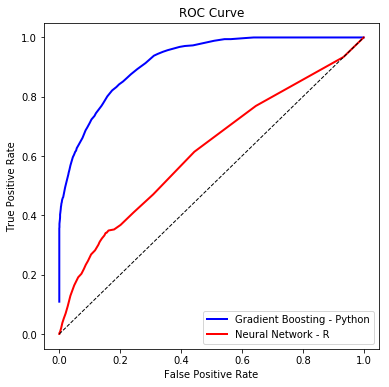

In [18]:
gbtree = s.CASTable("gradboost_Py_Assess_ROC").to_frame() 
nn = s.CASTable("nn_R_Assess_ROC").to_frame() 
plt.figure(figsize=(6,6))
plt.plot(gbtree._FPR_,gbtree._Sensitivity_,'bo-',linewidth=2,color='blue', marker=" ")
plt.plot(nn._FPR_,nn._Sensitivity_,'bo-',linewidth=2,color='red', marker=" ")

plt.plot(pd.Series(range(0,11,1))/10,pd.Series(range(0,11,1))/10,'k--',linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['Gradient Boosting - Python','Neural Network - R'],loc="best")
plt.show()

### Close the CAS Session

In [3]:
s.close()